### KNN -手写数字识别

In [15]:
import numpy as np
# 用于加载图片
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsTransformer

In [25]:
# load pci  位图  三维图片
digit = cv2.imread('./nums.bmp')
# 将彩色图片转为黑白的  降低灰度  数据减少了到了二维
digit = cv2.cvtColor(digit,code = cv2.COLOR_BGR2GRAY)
digit.shape

(195, 241)

In [71]:
## 加载所有图片
# 测试数据
X = []
for i in range(10):
    for j in range(0,10):
        digit = cv2.imread('./data/%d/%d.bmp'%(i,j))
        X.append(digit[:,:,0])
#转换为numpy对象
X = np.asarray(X)
# 预测结果
Y = np.array([i for i in range(10)]*10)

# X AND Y IS ONE TO ONE
# 排序
np.array(Y)
Y.sort()
# data has prepared done

NameError: name 'x' is not defined

In [39]:
X.shape

(100,)

In [18]:
digit

array([[245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245],
       ...,
       [245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245]], dtype=uint8)

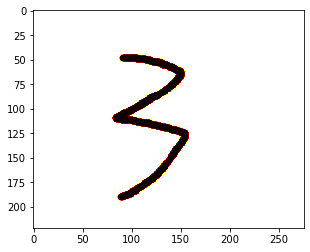

In [59]:
# 显示图片  目前digit是二维数据 高度 宽度，像素（只有一个值） ，用什么颜色表示呢
# 选择黑白  图片show就是黑白
# 
# 画图  随机显示图片
index = np.random.randint(0,100,size=1)[0]
digit = X[index]
plt.imshow(digit,cmap = plt.cm.hot)

## 以上 数据准备完毕 数据进行灰度化处理 降维

## X Y 分割  使用train_test_split算法分割为训练和验证数据

In [60]:
# 模型选择
from sklearn.model_selection import train_test_split

In [66]:
# 分割数据 默认0.25 划分后数据也是一一对应的
X_trian,Y_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

## 使用算法训练和预测

In [69]:
100**0.5

10.0

In [70]:
# 训练
knn = KNeighborsTransformer(n_neighbors=9)
knn.fit(X_trian,Y_train)

ValueError: setting an array element with a sequence.